# Film Industry Data Analysis for New Movie Studio

## Project Goal

This project seeks to evaluate box-office performance across film genres in order to determine which genre the company’s new movie studio should prioritize for production.

## Overview

This project undertakes a rigorous analysis of film-performance metrics aggregated from Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database, and The Numbers. The compiled dataset comprises ratings for a broad spectrum of genres viewed worldwide, capturing a representative selection of productions released over multiple years alongside their domestic and international revenue and critical reception. Descriptive statistical analysis confirms that performance outcomes vary markedly by genre. These insights will enable the company to strategically identify the genres most likely to deliver optimal financial returns while fulfilling the expectations of both domestic and global audiences.

## 1. Business Problem

In response to the proliferation of original video content from major studios, the company has resolved to enter this market by launching a new movie studio. However, it currently lacks in-house expertise in film production. You have therefore been charged with identifying which genres yield the strongest box-office returns.

The objective of this analysis is to determine the film genres that offer the greatest potential for revenue generation and audience satisfaction. To that end, we will address the following questions:

1. Which genres achieve the highest box-office performance?  
2. How does gross revenue vary by genre, and what differences emerge between domestic and international grosses?  
3. What are the return-on-investment (ROI) metrics for each genre?  
4. Are there release-date patterns that correlate with box-office success?  
5. What are the average audience and critical ratings by genre?  
6. How has the volume of films produced per genre evolved over time?  

Insights from these analyses will guide the company’s production strategy, ensuring optimal financial returns, audience satisfaction, and operational efficiency as it establishes its film studio.

## 2. Data Understanding

The datasets for this analysis were compiled from five primary sources—Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database, and The Numbers—to capture information on a wide array of films and their domestic and international performance over time.

**Primary Files**

1. **`bom.movie_gross.csv`** (Box Office Mojo)  
   Contains one row per film, with attributes including title, release year, distributing studio, and both domestic and foreign gross earnings.

2. **`im.db`** (IMDb SQLite database)  
   Comprises eight tables detailing various aspects of each title. For our purposes, the most relevant tables are:
   - **`movie_basics`**: core metadata such as title, year, and genre  
   - **`movie_ratings`**: user and critic scores  

   ![Movie Data ERD](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)

**Supplementary Files**  
These additional datasets will support data cleaning, enrichment, and cross-validation of the primary sources:

- **Rotten Tomatoes**  
  - `rt.movie_info.tsv`  
  - `rt.reviews.tsv`

- **The Movie Database**  
  - `tmdb.movies.csv`

- **The Numbers**  
  - `tn.movie_budgets.csv`

**Target Variables**

- **Average rating per genre** (aggregated from IMDb, Rotten Tomatoes, etc.)  
- **Domestic and foreign gross by genre**  
- **Annual production volume by genre**  

These measures will underpin our genre-level performance comparisons and inform strategic recommendations for the company’s new movie studio.

## 3.Data Preparation

## Loading the Datasets

In [1]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

%matplotlib inline
sns.set_style('whitegrid')

This section loads the datasets using pandas. If a file is not found or there's an error during parsing, an error message is printed.

In [2]:
#Loading the datasets
try:
    df_bom = pd.read_csv('bom.movie_gross.csv')
    display(df_bom.head())
except FileNotFoundError:
    print("bom.movie_gross.csv not found.")
except pd.errors.ParserError:
    print("Error parsing bom.movie_gross.csv")

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
try:
    df_tmdb = pd.read_csv('tmdb.movies.csv')
    display(df_tmdb.head())
except FileNotFoundError:
    print("tmdb.movies.csv not found.")
except pd.errors.ParserError:
    print("Error parsing tmdb.movies.csv")

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
try:
    df_tn = pd.read_csv('tn.movie_budgets.csv')
    display(df_tn.head())
except FileNotFoundError:
    print("tn.movie_budgets.csv not found.")
except pd.errors.ParserError:
    print("Error parsing tn.movie_budgets.csv")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Renaming columns for consistency and merging datasets

In [5]:
df_bom = df_bom.rename(columns={'title': 'movie'})
df_bom.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
df_tmdb = df_tmdb.rename(columns={'original_title': 'movie'})
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
merged_df = pd.merge(df_bom, df_tn, on='movie', how='inner')

In [8]:
merged_df.head()

,movie,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [9]:
# Drop the 'domestic_gross_x' column
merged_df = merged_df.drop('domestic_gross_x', axis=1)

# Rename the 'domestic_gross_y' column to 'domestic_gross'
merged_df = merged_df.rename(columns={'domestic_gross_y': 'domestic_gross'})

merged_df.head()

,movie,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [10]:
merged_df = pd.merge(merged_df, df_tmdb, on='movie', how='inner')
merged_df.head()

,movie,studio,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,Toy Story 3,BV,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",7,"[16, 10751, 35]",10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340
1,Inception,WB,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
2,Shrek Forever After,P/DW,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",38,"[35, 12, 14, 16, 10751]",10192,en,15.041,2010-05-16,Shrek Forever After,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",15,"[12, 14, 18, 10749]",24021,en,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909
4,Iron Man 2,Par.,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1364
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1365 non-null   object 
 1   studio             1364 non-null   object 
 2   foreign_gross      1182 non-null   object 
 3   year               1365 non-null   int64  
 4   id_x               1365 non-null   int64  
 5   release_date_x     1365 non-null   object 
 6   production_budget  1365 non-null   object 
 7   domestic_gross     1365 non-null   object 
 8   worldwide_gross    1365 non-null   object 
 9   Unnamed: 0         1365 non-null   int64  
 10  genre_ids          1365 non-null   object 
 11  id_y               1365 non-null   int64  
 12  original_language  1365 non-null   object 
 13  popularity         1365 non-null   float64
 14  release_date_y     1365 non-null   object 
 15  title              1365 non-null   object 
 16  vote_average       1365 

### Data Cleaning

To answer the questions for this analysis, the data requires cleaning by conversion of necessary columns into the right data types and cleaning missing values by applying the various methods to drop, replace or keep the values.


### Cleaning the merged dataset
First, we convert the necessary columns into the needed datatype.

In [12]:
# Clean currency fields
def clean_currency(x):
    if isinstance(x, str):
        return pd.to_numeric(x.replace('$', '').replace(',', ''), errors='coerce')
    return x

for col in ['production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross']:
    merged_df[col] = merged_df[col].apply(clean_currency)

# Parse dates
merged_df['release_date_x'] = pd.to_datetime(merged_df['release_date_x'], errors='coerce')

# Parse genres
def parse_genres(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

merged_df['parsed_genres'] = merged_df['genre_ids'].apply(parse_genres)

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1364
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              1365 non-null   object        
 1   studio             1364 non-null   object        
 2   foreign_gross      1182 non-null   float64       
 3   year               1365 non-null   int64         
 4   id_x               1365 non-null   int64         
 5   release_date_x     1365 non-null   datetime64[ns]
 6   production_budget  1365 non-null   int64         
 7   domestic_gross     1365 non-null   int64         
 8   worldwide_gross    1365 non-null   int64         
 9   Unnamed: 0         1365 non-null   int64         
 10  genre_ids          1365 non-null   object        
 11  id_y               1365 non-null   int64         
 12  original_language  1365 non-null   object        
 13  popularity         1365 non-null   float64       
 14  release_

In [14]:
merged_df.head()

,movie,studio,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count,parsed_genres
0,Toy Story 3,BV,652000000.0,2010,47,2010-06-18,200000000,415004880,1068879522,7,"[16, 10751, 35]",10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340,"[16, 10751, 35]"
1,Inception,WB,535700000.0,2010,38,2010-07-16,160000000,292576195,835524642,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]"
2,Shrek Forever After,P/DW,513900000.0,2010,27,2010-05-21,165000000,238736787,756244673,38,"[35, 12, 14, 16, 10751]",10192,en,15.041,2010-05-16,Shrek Forever After,6.1,3843,"[35, 12, 14, 16, 10751]"
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,53,2010-06-30,68000000,300531751,706102828,15,"[12, 14, 18, 10749]",24021,en,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,"[12, 14, 18, 10749]"
4,Iron Man 2,Par.,311500000.0,2010,15,2010-05-07,170000000,312433331,621156389,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]"


### Missing values

Checking for missing values and evaluating best way to handle them.

In [15]:
null_percentage = merged_df.isnull().sum() * 100 / len(merged_df)
null_percentage

movie                 0.000000
studio                0.073260
foreign_gross        13.406593
year                  0.000000
id_x                  0.000000
release_date_x        0.000000
production_budget     0.000000
domestic_gross        0.000000
worldwide_gross       0.000000
Unnamed: 0            0.000000
genre_ids             0.000000
id_y                  0.000000
original_language     0.000000
popularity            0.000000
release_date_y        0.000000
title                 0.000000
vote_average          0.000000
vote_count            0.000000
parsed_genres         0.000000
dtype: float64

### Replacing null values

#### The 'studio' column

The missing data from the 'studio' column is less than 0.1% hence we can just keep the null values by replacing with 'missing' without much affecting the data.

In [16]:
merged_df.fillna({'studio' : 'Missing'}, inplace=True)

#### The 'foreign_gross' column

The missing values in the 'foreign_gross' column are quite informative in analyzing the data, hence the best option would be to replace the null values with the median foreign_gross that least affects our data.

In [17]:
merged_df.fillna({'foreign_gross': merged_df['foreign_gross'].median()}, inplace=True)

In [18]:
null_percentage = merged_df.isnull().sum() * 100 / len(merged_df)
null_percentage

movie                0.0
studio               0.0
foreign_gross        0.0
year                 0.0
id_x                 0.0
release_date_x       0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
Unnamed: 0           0.0
genre_ids            0.0
id_y                 0.0
original_language    0.0
popularity           0.0
release_date_y       0.0
title                0.0
vote_average         0.0
vote_count           0.0
parsed_genres        0.0
dtype: float64

In [19]:
merged_df.head()

,movie,studio,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count,parsed_genres
0,Toy Story 3,BV,652000000.0,2010,47,2010-06-18,200000000,415004880,1068879522,7,"[16, 10751, 35]",10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340,"[16, 10751, 35]"
1,Inception,WB,535700000.0,2010,38,2010-07-16,160000000,292576195,835524642,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]"
2,Shrek Forever After,P/DW,513900000.0,2010,27,2010-05-21,165000000,238736787,756244673,38,"[35, 12, 14, 16, 10751]",10192,en,15.041,2010-05-16,Shrek Forever After,6.1,3843,"[35, 12, 14, 16, 10751]"
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,53,2010-06-30,68000000,300531751,706102828,15,"[12, 14, 18, 10749]",24021,en,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,"[12, 14, 18, 10749]"
4,Iron Man 2,Par.,311500000.0,2010,15,2010-05-07,170000000,312433331,621156389,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]"


In [20]:
merged_df.to_csv('merged_df.csv', index=False)

DATA VISUALIZATION
Objective 1: Which genres achieve the highest box-office performance?

In [21]:
 #Mapping of Genre IDs
genre_id_map = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

# Decode genres
def decode_genres(genre_list):
    return [genre_id_map.get(gid, str(gid)) for gid in genre_list]

merged_df['decoded_genres'] = merged_df['parsed_genres'].apply(decode_genres)

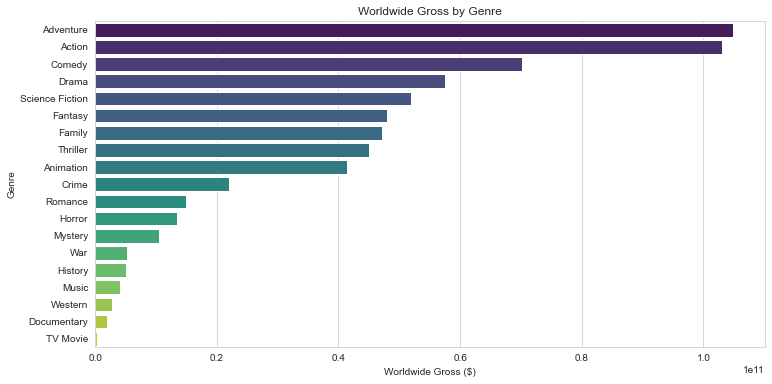

In [22]:
# Top Performing Genres
from collections import defaultdict

genre_gross = defaultdict(float)
for _, row in merged_df.iterrows():
    gross = row['worldwide_gross']
    genres = row['decoded_genres']
    if gross and genres:
        for genre in genres:
            genre_gross[genre] += gross

genre_gross_df = pd.DataFrame(list(genre_gross.items()), columns=['Genre', 'Total_Worldwide_Gross'])
genre_gross_df = genre_gross_df.sort_values(by='Total_Worldwide_Gross', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Total_Worldwide_Gross', y='Genre', data=genre_gross_df, palette='viridis')
plt.title('Worldwide Gross by Genre')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Genre')
plt.show()

## Hypothesis testing

Because you're comparing mean worldwide gross across multiple genres, the correct statistical test is a one-way ANOVA.

Hypotheses:
 
1.Null hypothesis (H₀): All genres have the same average worldwide gross.

2.Alternative hypothesis (H₁): At least one genre has a different average gross.

From this visualization we can see that Adventure movies are the highest, followed by Action movies and so on when it comes to the world wide gross revenue when it comes to this kind of movies.


In [23]:
#Prepare the Data for ANOVA
# Explode the list of genres into separate rows
exploded_df = merged_df.explode('decoded_genres')

# Drop rows with missing gross or genre
clean_df = exploded_df.dropna(subset=['worldwide_gross', 'decoded_genres'])

# Group data by genre and collect gross values
from scipy.stats import f_oneway

groups = [group['worldwide_gross'].values for _, group in clean_df.groupby('decoded_genres')]

# Run ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


F-statistic: 41.44, p-value: 0.0000


INTERPRET THE RESULT
If p-value < 0.05, reject the null hypothesis.

1.This means: "There is statistically significant evidence that at least one genre has a different average worldwide gross."

N/B Supports what the visualization suggests.

If p-value ≥ 0.05, fail to reject the null.

2.This means: "Any differences we see in the bar plot might just be due to random variation."

### OBJECTIVE 2  Gross revenue per Film Genre

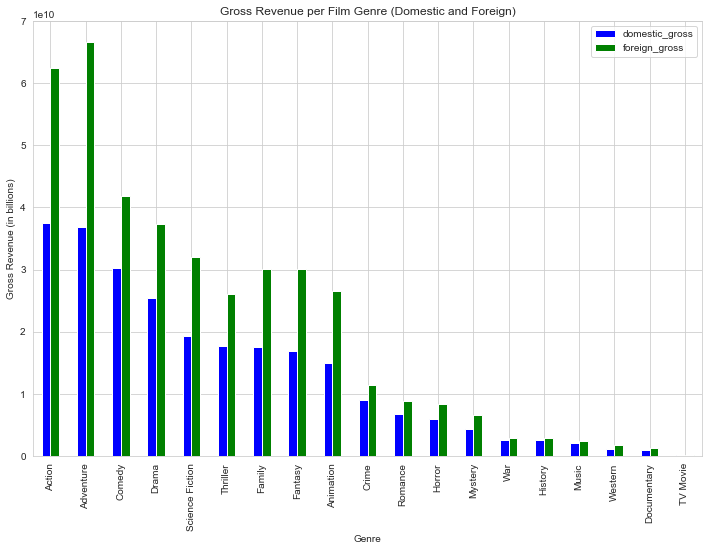

In [24]:
# Explode the decoded_genres column to create separate rows for each genre
exploded_df = merged_df.explode('decoded_genres')

#grouping the data by genre and finding the total of domestic and foreign gross for each genre
gross_revenue_per_genre = exploded_df.groupby('decoded_genres')[['domestic_gross', 'foreign_gross']].sum().sort_values(by='domestic_gross', ascending=False)

#Plotting the data
gross_revenue_per_genre.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'green'])

#Customize appearance
plt.title('Gross Revenue per Film Genre (Domestic and Foreign)')
plt.xlabel('Genre')
plt.ylabel('Gross Revenue (in billions)')
plt.xticks(rotation=90)
plt.show()

## Hypothesis Test

**Research Question:** Is there a significant difference between foreign gross revenue and domestic gross revenue across film genres?

**Null Hypothesis (H₀):** There is no significant difference between the mean foreign gross revenue and mean domestic gross revenue across film genres.

**Alternative Hypothesis (H₁):** There is a significant difference between the mean foreign gross revenue and mean domestic gross revenue across film genres.

**Test to Use:** Paired samples t-test
This test is appropriate because:

- We have two measurements (domestic and foreign gross) for the same subjects (film genres)
- We want to compare the means of these two related groups
- We're testing if the difference between these paired observations is statistically significant

**Implementation Steps:**

- Calculate the difference between foreign and domestic gross for each genre
- Compute the mean and standard deviation of these differences
- Calculate the t-statistic and p-value
- Compare the p-value to your significance level (typically 0.05)
- Make a decision about the null hypothesis

**Interpretation:**

- If p-value < 0.05: Reject the null hypothesis and conclude there is a significant difference
- If p-value ≥ 0.05: Fail to reject the null hypothesis

In [25]:
import scipy.stats as stats
import numpy as np

# From your existing dataframe
gross_revenue_per_genre = exploded_df.groupby('decoded_genres')[['domestic_gross', 'foreign_gross']].sum()

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(gross_revenue_per_genre['domestic_gross'], 
                                 gross_revenue_per_genre['foreign_gross'])

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Calculate mean difference for interpretation
mean_diff = np.mean(gross_revenue_per_genre['foreign_gross'] - gross_revenue_per_genre['domestic_gross'])
print(f"Mean difference (foreign - domestic): ${mean_diff}")

# Decision
alpha = 0.05
if p_value < alpha:
    print(f"Reject null hypothesis (p={p_value:.4f}). There is a significant difference between foreign and domestic gross revenue.")
else:
    print(f"Fail to reject null hypothesis (p={p_value:.4f}). There is no significant difference between foreign and domestic gross revenue.")

t-statistic: -3.9103
p-value: 0.0010
Mean difference (foreign - domestic): $7789628373.847369
Reject null hypothesis (p=0.0010). There is a significant difference between foreign and domestic gross revenue.


### OBJECTIVE 3
What are the return-on-investment (ROI) metrics for each genre?

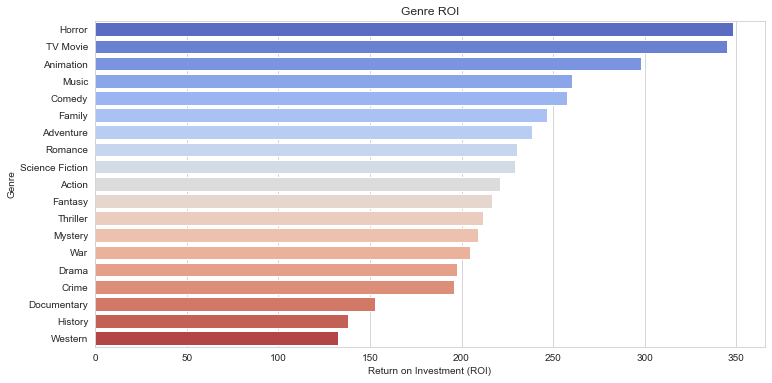

In [26]:
# Calculate total worldwide gross and production budget per genre
genre_roi = merged_df.explode('decoded_genres').groupby('decoded_genres').agg(
    total_worldwide_gross=('worldwide_gross', 'sum'),
    total_production_budget=('production_budget', 'sum')
)

# Calculate ROI per genre
genre_roi['ROI'] = ((genre_roi['total_worldwide_gross'] - genre_roi['total_production_budget']) / genre_roi['total_production_budget'])*100

# Sort genres by ROI in descending order
top_roi_genres = genre_roi.sort_values(by='ROI', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='ROI', y=top_roi_genres.index, data=top_roi_genres, palette='coolwarm')
plt.title('Genre ROI')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Genre')
plt.show()

Lets the df in ascending order to confirm if the visuals in the above bargraph are true

In [27]:
top_roi_genres

,total_worldwide_gross,total_production_budget,ROI
decoded_genres,,,
Horror,13386948449,2987507373,348.097587
TV Movie,222383055,50000000,344.766110
Animation,41377138212,10400500000,297.837971
Music,4150945858,1152600000,260.137590
Comedy,70114831180,19610920000,257.529535
Family,47206163616,13611400000,246.813433
Adventure,104846553825,30992400000,238.297627
Romance,14970770935,4535250000,230.098031
Science Fiction,51870785504,15750560000,229.326611
